# Social Sentiment Analysis using Restaurant Review.

## Importing library packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Loading dataset

In [ ]:
df = pd.read_csv('/content/Restaurant reviews.csv')

In [ ]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


## Data Preprocessing

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pictures,10000.0,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0
7514,1.0,2447.0000,NaN,2447.0,2447.0,2447.0,2447.0,2447.0


In [ ]:
df.shape

(10000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [ ]:
df.isnull().sum()

,0
Restaurant,0
Reviewer,38
Review,45
Rating,38
Metadata,38
Time,38
Pictures,0
7514,9999


In [ ]:
df.drop(columns=['Pictures','7514','Metadata','Time'], inplace= True)
df.dropna(inplace=True, axis=0)
df.head()

,Restaurant,Reviewer,Review,Rating
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
dtypes: object(4)
memory usage: 388.9+ KB


In [ ]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
dtypes: object(4)
memory usage: 311.2+ KB


convert review content to string

In [ ]:
df['Review'] = df['Review'].astype(str)

In [ ]:
df['Restaurant'].unique()

array(['Beyond Flavours', 'Paradise', 'Flechazo',
       'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company',
       "The Fisherman's Wharf", 'eat.fit', 'Shah Ghouse Spl Shawarma',
       'Hyper Local', 'Cream Stone', "Sardarji's Chaats & More",
       'Barbeque Nation', 'Absolute Sizzlers',
       'The Lal Street - Bar Exchange', "AB's - Absolute Barbecues",
       'KFC', 'NorFest - The Dhaba', 'Hotel Zara Hi-Fi',
       '10 Downing Street', 'Pakwaan Grand', '13 Dhaba',
       "Jonathan's Kitchen - Holiday Inn Express & Suites", 'B-Dubs',
       'Amul', 'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge',
       "3B's - Buddies, Bar & Barbecue", 'Behrouz Biryani',
       'Hunger Maggi Point', 'Pot Pourri', 'Pista House',
       'Marsala Food Company', 'Club Rogue',
       'Mazzo - Marriott Executive Apartments',
       'Green Bawarchi Restaurant', 'Banana Leaf Multicuisine Restaurant',
       'Kritunga Restaurant', 'The Glass Onion', 'Deli 9 Bistro',
       'Frio Bistro', 'Kara

In [ ]:
df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

## Text cleaning

Steps:

* Removing non-alphabetic characters.
* Converting text to lowercase.
* Tokenizing the text.
* Removing stopwords (except 'not').
* Stemming the words.
* Storing the cleaned reviews back in the DataFrame.

In [ ]:
# prompt: give the code for text cleaning process of the review column in the dataset and store it in the dataset

nltk.download('stopwords')
corpus = []
for i in range(0, df.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

# Store the cleaned text in a new column
df['Review'] = corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head()

,Restaurant,Reviewer,Review,Rating
0,Beyond Flavours,Rusha Chakraborty,ambienc good food quit good saturday lunch cos...,5
1,Beyond Flavours,Anusha Tirumalaneedi,ambienc good pleasant even servic prompt food ...,5
2,Beyond Flavours,Ashok Shekhawat,must tri great food great ambienc thnx servic ...,5
3,Beyond Flavours,Swapnil Sarkar,soumen da arun great guy behavior sincereti go...,5
4,Beyond Flavours,Dileep,food good order kodi drumstick basket mutton b...,5


In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|@[^\s]+')
    return url_pattern.sub(r'', text)

df["text"] = df["Review"].apply(lambda text: remove_urls(text))

In [ ]:
df.head()

,Restaurant,Reviewer,Review,Rating,text
0,Beyond Flavours,Rusha Chakraborty,ambienc good food quit good saturday lunch cos...,5,ambienc good food quit good saturday lunch cos...
1,Beyond Flavours,Anusha Tirumalaneedi,ambienc good pleasant even servic prompt food ...,5,ambienc good pleasant even servic prompt food ...
2,Beyond Flavours,Ashok Shekhawat,must tri great food great ambienc thnx servic ...,5,must tri great food great ambienc thnx servic ...
3,Beyond Flavours,Swapnil Sarkar,soumen da arun great guy behavior sincereti go...,5,soumen da arun great guy behavior sincereti go...
4,Beyond Flavours,Dileep,food good order kodi drumstick basket mutton b...,5,food good order kodi drumstick basket mutton b...


In [ ]:
# Group the data by star rating
rating_groups = df.groupby('Rating')
rating_counts = rating_groups.size()
print(rating_counts)

Rating
1       1735
1.5        9
2        684
2.5       19
3       1192
3.5       47
4       2373
4.5       69
5       3826
Like       1
dtype: int64


In [ ]:
# prompt: rewrite the column in the rating in a 5 scale

# Assuming your DataFrame is named 'df' and the rating column is 'Rating'

def convert_rating_scale(rating):
  """
  Converts the rating to a 5-scale rating.

  Args:
    rating: The original rating.

  Returns:
    The converted rating on a 5-scale.
  """
  if rating <= '1':
    return 1
  elif rating <= '2':
    return 2
  elif rating <= '3':
    return 3
  elif rating <= '4':
    return 4
  else:
    return 5

# Apply the function to the 'Rating' column
df['Rating'] = df['Rating'].apply(convert_rating_scale)

In [ ]:
# Group the data by star rating
rating_groups = df.groupby('Rating')
rating_counts = rating_groups.size()
print(rating_counts)

Rating
1    1735
2     693
3    1211
4    2420
5    3896
dtype: int64


## Data Visualization

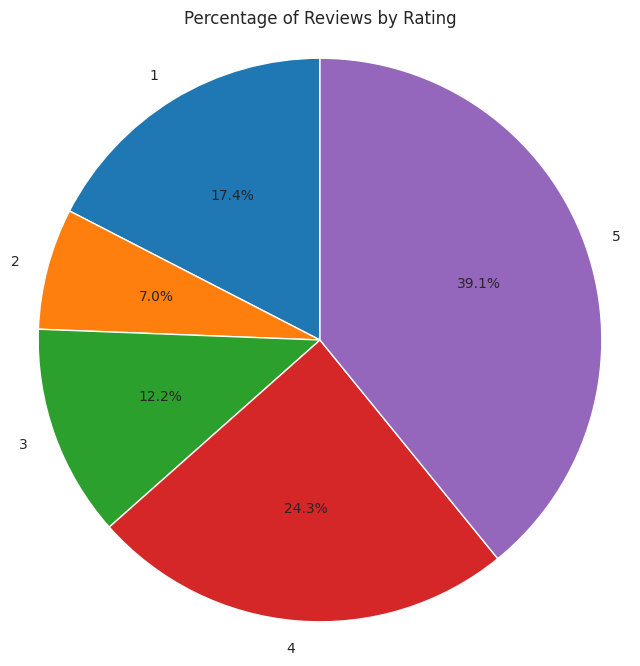

In [ ]:
# prompt: give the code for plotting the percentage of review in pie chart

# Calculate the percentage of reviews for each rating
rating_percentages = (rating_counts / rating_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_percentages, labels=rating_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Reviews by Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

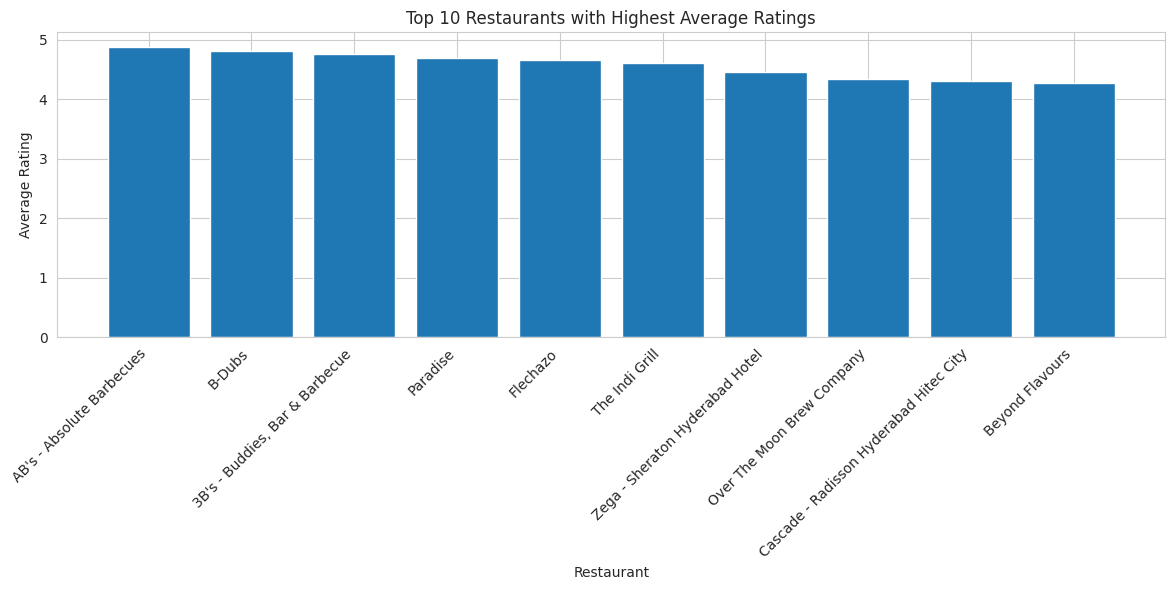

In [ ]:
# prompt: give the code for plotting the top 10 restaurants with high rating

# Group the data by restaurant and calculate the average rating
restaurant_ratings = df.groupby('Restaurant')['Rating'].mean()

# Sort the restaurants by average rating in descending order
top_restaurants = restaurant_ratings.sort_values(ascending=False)

# Get the top 10 restaurants
top_10_restaurants = top_restaurants.head(10)

# Create a bar plot of the top 10 restaurants
plt.figure(figsize=(12, 6))
plt.bar(top_10_restaurants.index, top_10_restaurants.values)
plt.xlabel('Restaurant')
plt.ylabel('Average Rating')
plt.title('Top 10 Restaurants with Highest Average Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

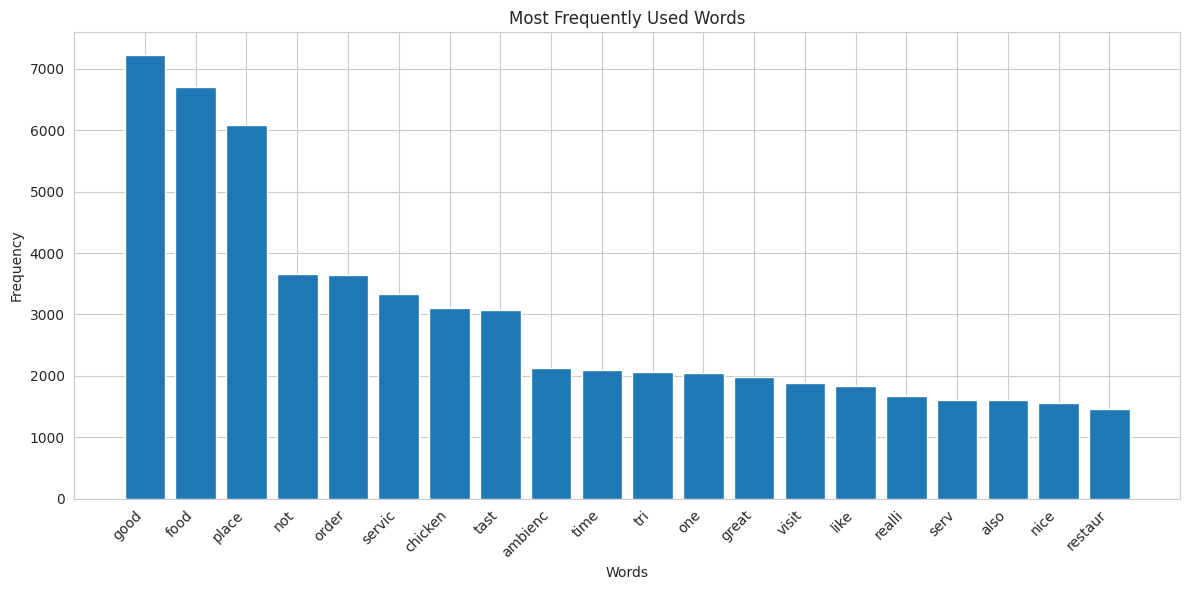

In [ ]:
# prompt: give the code for plotting the most frequently used words in the text

from collections import Counter

# Combine all the reviews into a single string
all_reviews = ' '.join(df['text'])

# Tokenize the string into words
words = all_reviews.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the 20 most frequent words
most_frequent_words = word_counts.most_common(20)

# Extract words and their frequencies
words, frequencies = zip(*most_frequent_words)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequently Used Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Sentiment Analysis

In [ ]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

df["Polarity"] = df["text"].apply(sentiment)
df.head(5)

,Restaurant,Reviewer,Review,Rating,text,Polarity
0,Beyond Flavours,Rusha Chakraborty,ambienc good food quit good saturday lunch cos...,5,ambienc good food quit good saturday lunch cos...,0.9274
1,Beyond Flavours,Anusha Tirumalaneedi,ambienc good pleasant even servic prompt food ...,5,ambienc good pleasant even servic prompt food ...,0.9001
2,Beyond Flavours,Ashok Shekhawat,must tri great food great ambienc thnx servic ...,5,must tri great food great ambienc thnx servic ...,0.8934
3,Beyond Flavours,Swapnil Sarkar,soumen da arun great guy behavior sincereti go...,5,soumen da arun great guy behavior sincereti go...,0.8591
4,Beyond Flavours,Dileep,food good order kodi drumstick basket mutton b...,5,food good order kodi drumstick basket mutton b...,0.9382


In [ ]:
df['Polarity'].max()

0.9992

In [ ]:
df['Polarity'].min()

-0.9892

In [ ]:
def senti(df):
    if df['Polarity'] >= 0.3:
        val = "Positive"
    elif df['Polarity'] <= -0.3:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [ ]:
df['sentiment'] = df.apply(senti, axis=1)

In [ ]:
df.head()

,Restaurant,Reviewer,Review,Rating,text,Polarity,sentiment
0,Beyond Flavours,Rusha Chakraborty,ambienc good food quit good saturday lunch cos...,5,ambienc good food quit good saturday lunch cos...,0.9274,Positive
1,Beyond Flavours,Anusha Tirumalaneedi,ambienc good pleasant even servic prompt food ...,5,ambienc good pleasant even servic prompt food ...,0.9001,Positive
2,Beyond Flavours,Ashok Shekhawat,must tri great food great ambienc thnx servic ...,5,must tri great food great ambienc thnx servic ...,0.8934,Positive
3,Beyond Flavours,Swapnil Sarkar,soumen da arun great guy behavior sincereti go...,5,soumen da arun great guy behavior sincereti go...,0.8591,Positive
4,Beyond Flavours,Dileep,food good order kodi drumstick basket mutton b...,5,food good order kodi drumstick basket mutton b...,0.9382,Positive


<ipython-input-197-562bf1ef79cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="sentiment", data=df,


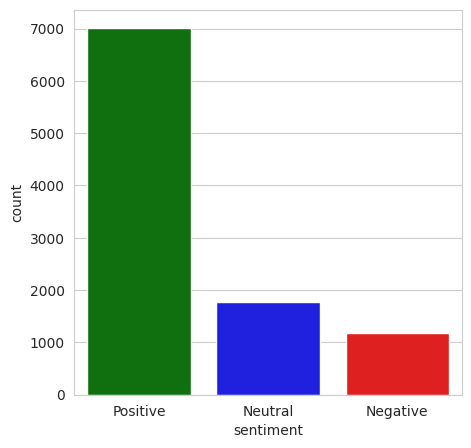

In [ ]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="sentiment", data=df,
                  palette=dict(Neutral="blue", Positive="Green", Negative="Red"))

## Rating and sentiment correlation

Correlation between rating and sentiment polarity: 0.6344355791336369


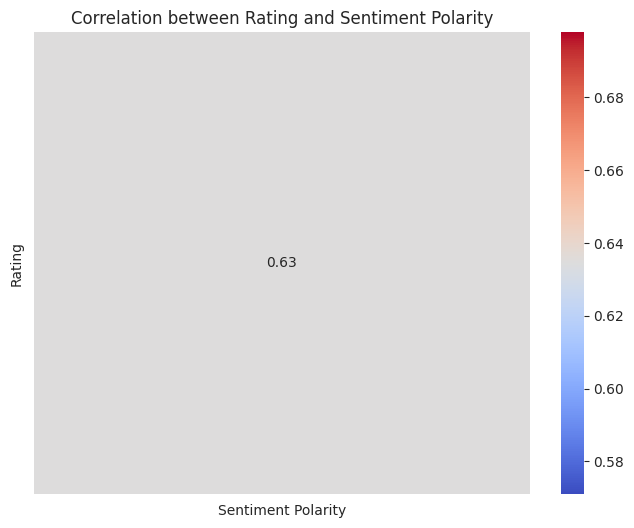

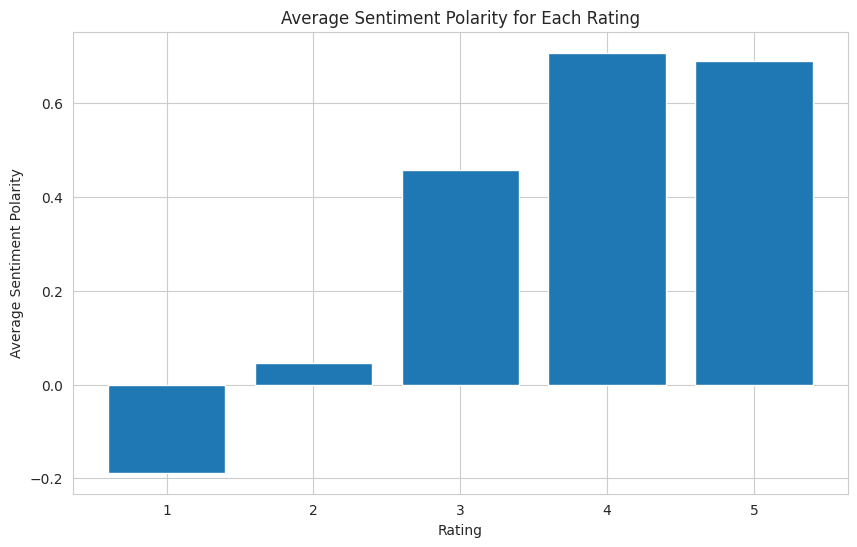

In [ ]:
# prompt: give the code to find the correlation between the rating and the sentiment based on each ratingand visualize it using heat map

# Calculate the correlation between rating and sentiment polarity
correlation = df['Rating'].corr(df['Polarity'])
print(f"Correlation between rating and sentiment polarity: {correlation}")

# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap([[correlation]], annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Sentiment Polarity'], yticklabels=['Rating'])
plt.title('Correlation between Rating and Sentiment Polarity')
plt.show()

# Group by rating and calculate the mean sentiment polarity for each rating
rating_sentiment_correlation = df.groupby('Rating')['Polarity'].mean()

# Visualize the relationship using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(rating_sentiment_correlation.index, rating_sentiment_correlation.values)
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Polarity')
plt.title('Average Sentiment Polarity for Each Rating')
plt.show()


## Word cloud to visualize the positive and negative words

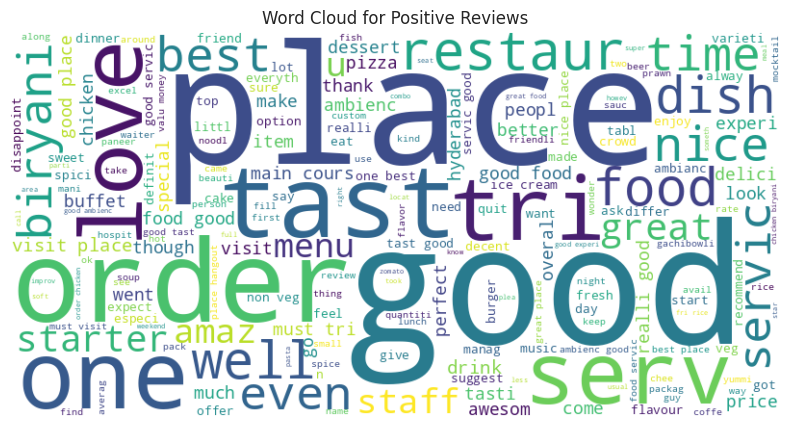

In [202]:
# prompt: give the code for the positive word using the word cloud

# Create a word cloud for positive reviews
positive_reviews = df[df['sentiment'] == 'Positive']['text']
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

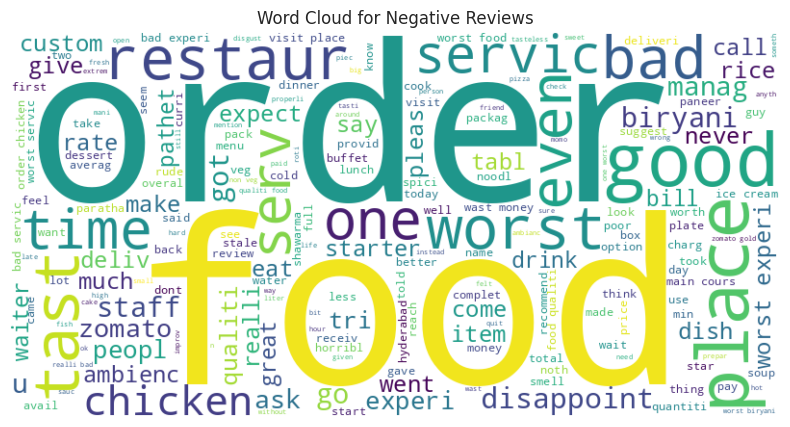

In [203]:
# prompt:  give the code for the negative word using the word cloud

# Create a word cloud for negative reviews
negative_reviews = df[df['sentiment'] == 'Negative']['text']
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

## Model building

In [ ]:
# prompt: give the code to build the sentiment analyser model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare data for model training
X = df['text']  # Features (review text)
y = df['sentiment'] # Target (sentiment)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000) # Increase max_iter if needed
model.fit(X_train_tfidf, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.856353591160221
              precision    recall  f1-score   support

    Negative       0.78      0.59      0.68       256
     Neutral       0.70      0.59      0.64       347
    Positive       0.90      0.97      0.93      1388

    accuracy                           0.86      1991
   macro avg       0.79      0.72      0.75      1991
weighted avg       0.85      0.86      0.85      1991

[[ 152   60   44]
 [  32  204  111]
 [  10   29 1349]]


Conclusion:

The model give an accuracy of 85%

Precision:
The model prediction of +ve is right in 90% of time.

Recall:
Out of the total -ve and neutral it predicts 59% correctly. So the improvement is required in this area.